# Data Exploration

### Visualization of relationships between variables 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Select Time period from "03-13, 03-21, 04-18, 07-07"
#day = "07-07" 
month = "march"
# Load Data
Flow_data = pd.read_csv("WRD_flow_data_"+month+"_2021.csv")
Power_data = pd.read_csv("WRD_power_data_"+month+"_2021.csv")

In [3]:
print('-'*30)
print("Valid X and Y data value Choices")
print('-'*30)

print('-'*30)
print("Flow Data")
print('-'*30)
for col in Flow_data.columns:
    print(col)
print('-'*30)
print("Power Data")
print('-'*30)
for col in Power_data.columns:
    print(col)

# Merge Data into one dataframe for easy plotting
Data = pd.merge(Flow_data,Power_data,how='outer')

------------------------------
Valid X and Y data value Choices
------------------------------
------------------------------
Flow Data
------------------------------
Date Time
whole_plant-->
RO_Feed_gpm
Antiscalant_gpm
UV1_MGD
UV2_MGD
Product_water_MGD
Brine_gpm
TRO_bypass_gpm
Total_RO_permeate_gpm
RO_Flush_MGD
Concentrate_gpm
train 1 only-->
permeate_train1_s1_gpm
permeate_train1_s2_gpm
PRO_conc_train1_gpm
TRO_permeate_train1_gpm
TRO_conc_train1_gpm
Con_recycle_gpm
train 2 only --> 
permeate_train2_s1_gpm
permeate_train2_s2_gpm
PRO_conc_train1_gpm.1
TRO_permeate_train2_gpm
TRO_conc_train2_gpm
Con_recycle_train2_gpm
train3 only -->
permeate_train3_s1_gpm
permeate_train3_s2_gpm
PRO_conc_train3_gpm
TRO_permeate_train3_gpm
TRO_conc_train3_gpm
Con_recycle_train3_gpm
Unnamed: 33
train4 only -->
permeate_train4_s1_gpm
permeate_train4_s2_gpm
PRO_conc_train4_gpm
TRO_permeate_train4_gpm
TRO_conc_train4_gpm
Con_recycle_train4_gpm
------------------------------
Power Data
-----------------------

In [ ]:
# User input to define x and y data
x_data_name = "RO_total_permeate_flow_gpm"
y_data_name_list = ["UV_gpm"]
plot_title = "Total Permeate Flow vs. Total UV Flow"

### Adding Derived Quantities to plot

In [ ]:
# Flowrate to both UV units
Data["UV_gpm"] = (Data["UV1_mgd"] + Data["UV2_mgd"]) * 1e6 / 24 / 60

In [ ]:
# Create Plot
x_data = Data[x_data_name]
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    figure = plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel(x_data_name)

plt.ylabel("UV_total_flow_gpm")
x = np.linspace(0,10000)
plt.plot(x,x,"-k",label="y=x")
#Adjust Axes as needed
# plt.xlim(1400,2700)
# plt.ylim(0,1)
plt.legend(loc='upper left')
#Export Figure
plt.savefig(plot_title+".png")


## Next plot: Specific Energy of RO of a train

In [ ]:
# Specific Energy of RO 

# User input to define x and y data
x_data_name = "RO_train1_permeate_flow_gpm"
y_data_name_list = ["SEC_kWh/m3"]
plot_title = "SEC vs. Permeate Flow - Train 1"

# Power from the three pumps / volumetric flowrate of the permeate
Data['RO_train1_permeate_flow_gpm'] = Data['RO_train1_s1_permeate_flow_gpm'] + Data['RO_train1_s2_permeate_flow_gpm'] + Data['RO_train1_s3_permeate_flow_gpm']
Data["SEC_kW/gpm"] = (Data["PRO_feed_pump1_kW"] + Data["PRO_interstage_pump1_kW"] + Data["TSRO_feed_pump1_kW"]) / Data['RO_train1_permeate_flow_gpm']
Data["SEC_kWh/m3"] = Data["SEC_kW/gpm"] * 264 /60

In [ ]:
# Create Plot
x_data = Data[x_data_name]
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    figure = plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel(x_data_name)

plt.ylabel("Specific Energy Consumption (kWh/m^3)")
#Adjust Axes as needed
plt.xlim(1400,2700)
plt.ylim(0,1)
plt.legend(loc='upper left')
#Export Figure
# plt.savefig(plot_title+".png")


### Feed flow over time

In [ ]:
# User input to define x and y data
x_data_name = "Date Time"
y_data_name_list = ["RO_total_feed_flow_gpm"]
plot_title = "Plant Feed vs. Time"

# No derived quantities

In [ ]:
# Create Plot
x_data = Data[x_data_name]
x_data = np.arange(0,len(x_data))
figure,ax = plt.subplots()
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel("Minute of Feb. 2021")
# ax.set_xticklabels([])
# plt.autofmt_xdate()
plt.ylabel(y_data_name_list[0])
# Adjust Axes as needed
# plt.xlim(1400,2700)
# plt.ylim(0,1)
# plt.legend(loc='upper left')
#Export Figure
plt.savefig(plot_title+".png")


### Total Power vs. Flowrate

In [ ]:
# User input to define x and y data
plot_title = "Plant Power vs. Feed Flowrate"
x_data_name = "RO_total_feed_flow_gpm"
y_data_name_list = ["plant_power_demand_total_kW"]

# No derived quantities

In [ ]:
# Create Plot
x_data = Data[x_data_name]
figure,ax = plt.subplots()
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel(x_data_name)
plt.ylabel(y_data_name_list[0])
# Adjust Axes as needed
# plt.xlim(1400,2700)
# plt.ylim(0,1)
# plt.legend(loc='upper left')
#Export Figure
plt.savefig(plot_title+".png")

### PRO Feed Pump: Power versus Flowrate

In [4]:
# User input to define x and y data
plot_title = "PRO1 Feed Pump"
x_data_name = "PRO1_feed_pump_flow_m3/s"
y_data_name_list = ["PRO_feed_pump_train1_kW"]

# No derived quantities
Data["PRO1_feed_pump_flow_m3/s"] = (Data["permeate_train1_s1_gpm"] + Data["permeate_train1_s2_gpm"] + Data["PRO_conc_train1_gpm"]) / 264.2 / 60

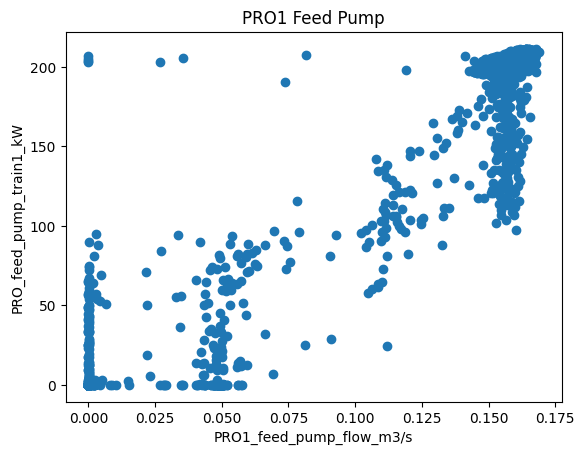

In [6]:
# Create Plot
x_data = Data[x_data_name]
figure,ax = plt.subplots()
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel(x_data_name)
plt.ylabel(y_data_name_list[0])
# Adjust Axes as needed
# plt.xlim(1400,2700)
# plt.ylim(0,1)
# plt.legend(loc='upper left')
#Export Figure
plt.savefig(plot_title+".png")

### Pump Efficiency

In [ ]:
# User input to define x and y data
plot_title = "PRO Feed Pump Efficiency vs. Feed Flowrate"
x_data_name = "PRO_feed_pump_effeciency_train1"
y_data_name_list = ["plant_power_demand_total_kW"]

# No derived quantities